In [15]:
#libs
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import pathlib
import cv2
import imageio
import numpy as np

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
#load the data from WAD
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
#getting the classifications, since cifar10 provides a clean dataset this is ez
classification = [ 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [6]:
#Turning labels into a set of 10 numbers to input them into the neural network\
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [7]:
#normalize the pixels to be in a range between 0 and 1
x_train = x_train / 255
y_train = y_train / 255

In [8]:
#creating the model architeture, so ez
model = Sequential()

#Add the first layer
model.add( Conv2D(32, (5,5), activation = 'relu', input_shape= (32,32,3)) )

#2nd layer, pooling layer
model.add( MaxPooling2D(pool_size = (2,2) ) )

#another covultion layer
model.add( Conv2D(32, (5,5), activation = 'relu') )
                  
#double pooling layer
model.add( MaxPooling2D(pool_size = (2,2) ) )   

#flattening layer
model.add(Flatten())


#add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#add a droput layer
model.add(Dropout(0.5))

#add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#add a droput layer
model.add(Dropout(0.5))

#add a layer with 250neurons
model.add(Dense(250, activation='relu'))

#a layer with 10 softmax neurons
model.add(Dense(10, activation='softmax'))

In [9]:
#compile
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [11]:
#rocky mode
hist = model.fit(x_train, y_train_one_hot,
                 batch_size=256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 23s 146ms/step - loss: 1.1728 - accuracy: 0.5803 - val_loss: 1.1412 - val_accuracy: 0.5917
Epoch 2/10
157/157 [==============================] - 23s 144ms/step - loss: 1.0862 - accuracy: 0.6119 - val_loss: 1.0456 - val_accuracy: 0.6271
Epoch 3/10
157/157 [==============================] - 24s 153ms/step - loss: 1.0025 - accuracy: 0.6440 - val_loss: 1.1121 - val_accuracy: 0.6092
Epoch 4/10
157/157 [==============================] - 26s 164ms/step - loss: 0.9541 - accuracy: 0.6623 - val_loss: 1.0069 - val_accuracy: 0.6459
Epoch 5/10
157/157 [==============================] - 26s 163ms/step - loss: 0.8970 - accuracy: 0.6820 - val_loss: 0.9545 - val_accuracy: 0.6663
Epoch 6/10
157/157 [==============================] - 25s 156ms/step - loss: 0.8471 - accuracy: 0.6991 - val_loss: 0.9922 - val_accuracy: 0.6605
Epoch 7/10
157/157 [==============================] - 24s 156ms/step - loss: 0.8014 - accuracy: 0.7184 - val_loss: 0.9215 - val_ac

In [12]:
#eval
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 2s 7ms/step - loss: 159.9343 - accuracy: 0.5403


0.5403000116348267

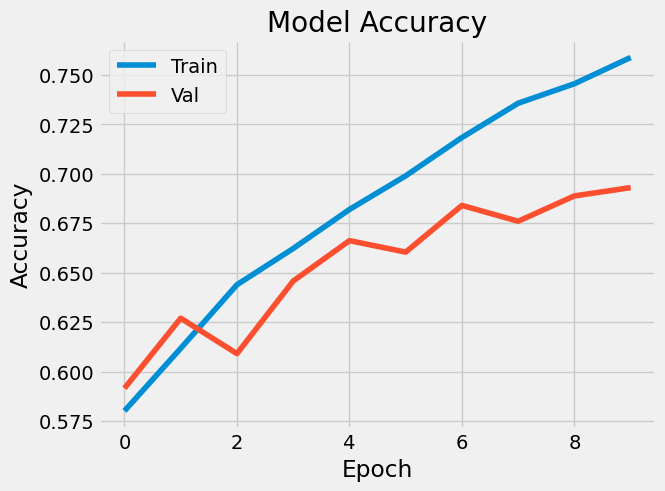

In [13]:
#model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc= 'upper left')
plt.show()


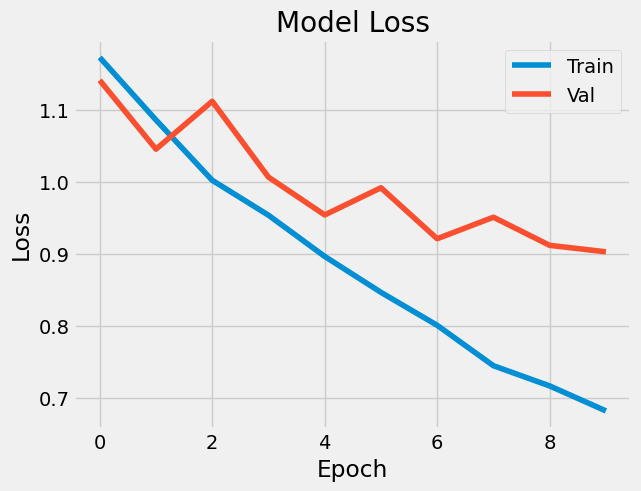

In [14]:
#model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc= 'upper right')
plt.show()

In [95]:
#shitshow for img showing
training_paths = pathlib.Path('../').glob('*.jpg')
training_sorted = sorted([x for x in training_paths])
im_path = training_sorted[2]

new_image = plt.imread(im_path)
img = plt.imshow(new_image)

#resize
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(new_image)

In [96]:
#model prediction
predictions = model.predict(np.array([resized_image]))
predictions

array([[6.7831790e-03, 1.0619758e-04, 1.1857830e-02, 1.8438092e-01,
        2.1279225e-01, 4.2437711e-01, 1.9999533e-03, 1.5641651e-01,
        7.9755584e-04, 4.8855494e-04]], dtype=float32)

In [97]:
#datamsciencenm
#sorting the predictions into useful data
list_index = [i for i in range(10)]
aux = predictions

for i in range(10):
    for j in range(10):
        if aux[0][list_index[i]] > aux[0][list_index[j]]:
            temp = list_index[i] 
            list_index[i] = list_index[j]
            list_index[j] = temp

for i in range(10):
    print(classification[list_index[i]], ' : ', round(predictions[0][list_index[i]] *100, 2) ,'%')

dog  :  42.44 %
deer  :  21.28 %
cat  :  18.44 %
horse  :  15.64 %
bird  :  1.19 %
airplane  :  0.68 %
frog  :  0.2 %
ship  :  0.08 %
truck  :  0.05 %
automobile  :  0.01 %
